## Fifa World Cup Exploratory Data Analysis

A new football club named ‘Brussels United FC’ has just been inaugurated. As a member of this club, you have been assigned a task to carry analysis on matches, players, and world cup data. Here we need to analyze the countries which have won the world cup the most with attendance, goal, and matches per cup based on cities. Also distribution of home and away goals. Whether playing in the home country is a factor for winning or not?


### 1.1 Import all necessary packages for reading in and visualizing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

Next I import the data sets via csv

In [2]:
matches = pd.read_csv('WorldCupMatches.csv')
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [3]:
players = pd.read_csv('WorldCupPlayers.csv')
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [4]:
cups = pd.read_csv('WorldCups.csv')
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [5]:
matches.shape

(4572, 20)

In [6]:
players.shape

(37784, 9)

In [7]:
cups.shape

(20, 10)

In [8]:
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [9]:
players.columns

Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object')

In [10]:
cups.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

## 1.2 Matches Deep Dive

In [11]:
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see we have lots of missing values in the "matches" dataset.  We can drop or impute.  Let's explore.

In [12]:
matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

Given that there are exactly 3720 missing points for each row, let's drop

In [13]:
matches = matches.dropna()

Using dropna() I drop all missing values, and we can see below this was succesful!

In [14]:
matches.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [15]:
matches['Win conditions'].value_counts()

                                                 787
Italy win after extra time                         5
Argentina win after extra time                     4
Belgium win after extra time                       3
Win on Golden Goal                                 3
England win after extra time                       3
Brazil win on penalties (3 - 2)                    3
Netherlands win on penalties (4 - 3)               2
Argentina win on penalties (2 - 4)                 2
Germany win after extra time                       2
France win after extra time                        2
France win on penalties (3 - 4)                    2
Costa Rica win on penalties (5 - 3)                2
 win on penalties (5 - 4)                          1
Germany FR win on penalties (4 - 1)                1
Brazil win after extra time                        1
Czechoslovakia win after extra time                1
Hungary win after extra time                       1
Spain win after extra time                    

Dropping win conditions as most of the data is empty!

In [16]:
matches = matches.drop(['Win conditions'],axis=1)

In [17]:
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


Grouping goals to see the average number of home goals and away goals by team

In [18]:
home_goals = matches.groupby('Home Team Name') ['Home Team Goals'].mean().to_frame().reset_index()

In [19]:
away_goals= matches.groupby('Home Team Name') ['Away Team Goals'].mean().to_frame().reset_index()

In [20]:
home_vs_away = home_goals.merge(away_goals, how = 'left', on = 'Home Team Name')

In [21]:
home_vs_away['Home Team Name']=home_vs_away['Home Team Name'].str.replace('rn">','', regex=True)

In [22]:
home_vs_away

,Home Team Name,Home Team Goals,Away Team Goals
0,Algeria,0.833333,1.666667
1,Angola,0.000000,1.000000
2,Argentina,2.055556,0.814815
3,Australia,1.166667,1.833333
4,Austria,2.384615,1.307692
...,...,...,...
73,Bosnia and Herzegovina,3.000000,1.000000
74,Republic of Ireland,0.400000,0.400000
75,Serbia and Montenegro,0.000000,1.000000
76,Trinidad and Tobago,0.000000,0.000000


We can see the summary stats between Home Team Goals & Away Team Goals below

In [23]:
home_vs_away.describe()

,Home Team Goals,Away Team Goals
count,78.000000,78.000000
mean,1.350304,1.294103
std,0.953159,0.905775
min,0.000000,0.000000
25%,0.875000,0.842193
50%,1.269697,1.017857
75%,1.851190,1.592857
max,5.000000,7.000000


Let's see if there is a stat sig difference between the goals scored by teams at home and goals scored by teams at away

In [24]:
from scipy import stats
stats.ttest_ind(home_vs_away['Home Team Goals'],home_vs_away['Away Team Goals'])

Ttest_indResult(statistic=0.3774846346767378, pvalue=0.7063332043448662)

We can see that the number of goals scored by when a club is the Home team or the Away team is not statistically significant, given a high P value of 0.7

Let's create a new variable that measures if a match was "won" or not!

In [25]:
def outcome (matches):
    if matches['Home Team Goals'] > matches["Away Team Goals"]:
        return 1
    if matches["Away Team Goals"] > matches["Home Team Goals"]:
        return 0
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return 0

In [26]:
matches["outcome"] = matches.apply(lambda matches:outcome(matches),axis=1)


In [27]:
matches['outcome'].value_counts()

1    486
0    364
Name: outcome, dtype: int64

In [28]:
matches['outcome'].describe()

count    850.000000
mean       0.571765
std        0.495114
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: outcome, dtype: float64

In [29]:
stats.ttest_ind(matches['outcome']==1,matches['outcome']==0)

Ttest_indResult(statistic=5.976265065441025, pvalue=2.776098996618831e-09)

In [30]:
p_value = 2.08e-58

In [31]:
p_value

2.08e-58

We have proven that while the number of goals don't go up, there is a clear Home Court Advantage! 

## 1.3 Players Deep Dive

Let's dive into the individual player data!

In [32]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


I join the palyer data to the matches data

In [33]:
match_players = players.merge(matches, how = 'left', on ='MatchID')

In [34]:
match_players

,RoundID_x,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID_y,Home Team Initials,Away Team Initials,outcome
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,1930.0,...,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,FRA,MEX,1.0
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,1930.0,...,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,FRA,MEX,1.0
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,...,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,FRA,MEX,1.0
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,...,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,FRA,MEX,1.0
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,1930.0,...,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,FRA,MEX,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39159,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65',2014.0,...,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,GER,ARG,1.0
39160,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN,2014.0,...,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,GER,ARG,1.0
39161,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN,2014.0,...,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,GER,ARG,1.0
39162,255959,300186501,ARG,SABELLA Alejandro (ARG),N,23,BASANTA,NaN,NaN,2014.0,...,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,GER,ARG,1.0


Next I want to group by the average game outcome for each player (1 means they won, 0 means loss or tie).  We want a player to be as close to 1 as possible!

In [35]:
player_wins= match_players.groupby('Player Name') ['outcome'].mean().to_frame().reset_index()

In [36]:
player_wins.sort_values(by ='outcome', ascending = False)

,Player Name,outcome
3831,Jozef JURKANIN,1.0
2114,FESTA,1.0
1777,D�EKO,1.0
7026,Tom FLORIE,1.0
1774,Duncan COLE,1.0
...,...,...
1535,DIKGACOI,0.0
1533,DIEGO COSTA,0.0
1529,DIAZ J.,0.0
1527,DIATTA,0.0


Next I want to see how many matches each player played -- get a score of "1" as an outcome isn't that impressive if the player has only played a handful of games!

In [37]:
player_matches= match_players.groupby('Player Name') ['MatchID'].count().to_frame().reset_index()

In [38]:
consistency = player_wins.merge(player_matches, how = 'left', on = 'Player Name')

In [39]:
consistency['match count'] = consistency['MatchID']

In [40]:
consistency['Player Name']=consistency['Player Name'].str.replace('?','', regex=True)

In [41]:
consistency.sort_values(by= ['match count','outcome'], ascending = False)

,Player Name,outcome,MatchID,match count
4066,KLOSE,0.416667,38,38
5464,OSCAR,0.416667,36,36
5201,M�LLER,0.437500,34,34
3400,JULIO CESAR,0.411765,34,34
6029,RONALDO,0.545455,33,33
...,...,...,...,...
7468,Wladyslaw SZSZEPANIAK,1.000000,1,1
70,ABOU TARIKA,0.000000,1,1
3058,Hussein SULIMANI,0.000000,1,1
5183,Mourad MELKI,0.000000,1,1


In [42]:
mean_match = consistency['match count'].mean()
mean_match

5.1107921179694635

In [43]:
mean_outcome = consistency['outcome'].mean()
mean_outcome

0.5885992593763244

In [44]:
best_players = consistency[(consistency['match count'] >= mean_match) & (consistency['outcome'] > mean_outcome)]

In [45]:
best_players.sort_values(by = 'outcome', ascending = False)

,Player Name,outcome,MatchID,match count
4152,Karl MAI,1.0,6,6
6184,Richard HERRMANN,1.0,6,6
4215,Klaus FICHTEL,1.0,6,6
1247,CLODOALDO,1.0,6,6
6227,Robert SARA,1.0,6,6
...,...,...,...,...
5939,R. MARQUEZ,0.6,15,15
4322,LICHTSTEINER,0.6,10,10
6539,SOCRATES,0.6,10,10
7530,YORDANOV,0.6,10,10


In [46]:
best_players = best_players.drop(columns = 'MatchID')
best_players

,Player Name,outcome,match count
10,A. BALANTA,0.909091,11
18,A. GONZALEZ,0.714286,7
19,A. GUARDADO,0.727273,11
22,A. HERNANDEZ,0.714286,7
30,A. MEJIA,0.909091,11
...,...,...,...
7621,Zeljko MATUS,1.000000,6
7624,Zinedine ZIDANE,0.714286,7
7625,Zlatko CAJKOVSKI,0.833333,6
7629,Zlatko YANKOV,0.600000,10


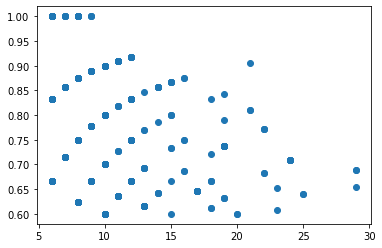

In [54]:
x = best_players['match count']
y = best_players['outcome']

plt.scatter(x, y)
plt.show()

In [55]:
from scipy.stats import pearsonr

In [56]:
# calculate Pearson's correlation
corr, _ = pearsonr(x, y)

In [57]:
corr

-0.33911334591644976